In [30]:
# Adult income dataset Predict whether a person will end up earning more than 50k
# using factors like age, education, background, gender, marital status, etc.
# : 🎯 Target: ‘income’ 🔗 Link: Kaggle 📦Dimensions: (48842, 15) 
#⚙Missing values: Yes

In [31]:
import numpy as np
import pandas as pd


from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split




# Classification

In [32]:
df = pd.read_csv("https://github.com/fenago/datasets/blob/main/adultIncome.csv?raw=true")
df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
41677,34,Local-gov,325792,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
8130,67,Private,131656,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2392,24,United-States,>50K
23378,45,Self-emp-not-inc,40666,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
2623,63,Private,153894,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,24,Puerto-Rico,<=50K
40141,65,Self-emp-inc,157403,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K


In [33]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [34]:
df['race'].unique()
# df['quality'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [35]:
df = df.dropna()

In [36]:
# numerical features
df_numerical=df.select_dtypes(include='number')
df_numerical.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [43]:
df_numerical.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [37]:
# categorical features
df_categorical=df.select_dtypes(exclude='number')
variables_categorical=df_categorical.columns

In [38]:
# splitting
from sklearn.model_selection import train_test_split
X=df.drop('income',axis=1)
y=df['income']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [39]:
variables_categorical

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'native-country'])
)

In [45]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train).toarray()
X_test = transformer.transform(X_test).toarray()



In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.fit_transform(y_test)

In [50]:
import tensorflow as tf
tf.random.set_seed(42)

# 128 + 256 + 256 neurons in 3 hidden layers + 1 sigmoid activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Adam is gradient descent
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1222/1222 [==============================] - 7s 4ms/step - loss: 0.3515 - accuracy: 0.8346 - precision: 0.6965 - recall: 0.5533
Epoch 2/100
1222/1222 [==============================] - 10s 8ms/step - loss: 0.3265 - accuracy: 0.8486 - precision: 0.7302 - recall: 0.5873
Epoch 3/100
1222/1222 [==============================] - 9s 7ms/step - loss: 0.3176 - accuracy: 0.8514 - precision: 0.7347 - recall: 0.5977
Epoch 4/100
1222/1222 [==============================] - 8s 6ms/step - loss: 0.3120 - accuracy: 0.8555 - precision: 0.7415 - recall: 0.6125
Epoch 5/100
1222/1222 [==============================] - 7s 6ms/step - loss: 0.3075 - accuracy: 0.8582 - precision: 0.7474 - recall: 0.6200
Epoch 6/100
1222/1222 [==============================] - 7s 5ms/step - loss: 0.3024 - accuracy: 0.8594 - precision: 0.7516 - recall: 0.6205
Epoch 7/100
1222/1222 [==============================] - 5s 4ms/step - loss: 0.2967 - accuracy: 0.8597 - precision: 0.7551 - recall: 0.6164
Epoch 8/100
1222/12

In [51]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

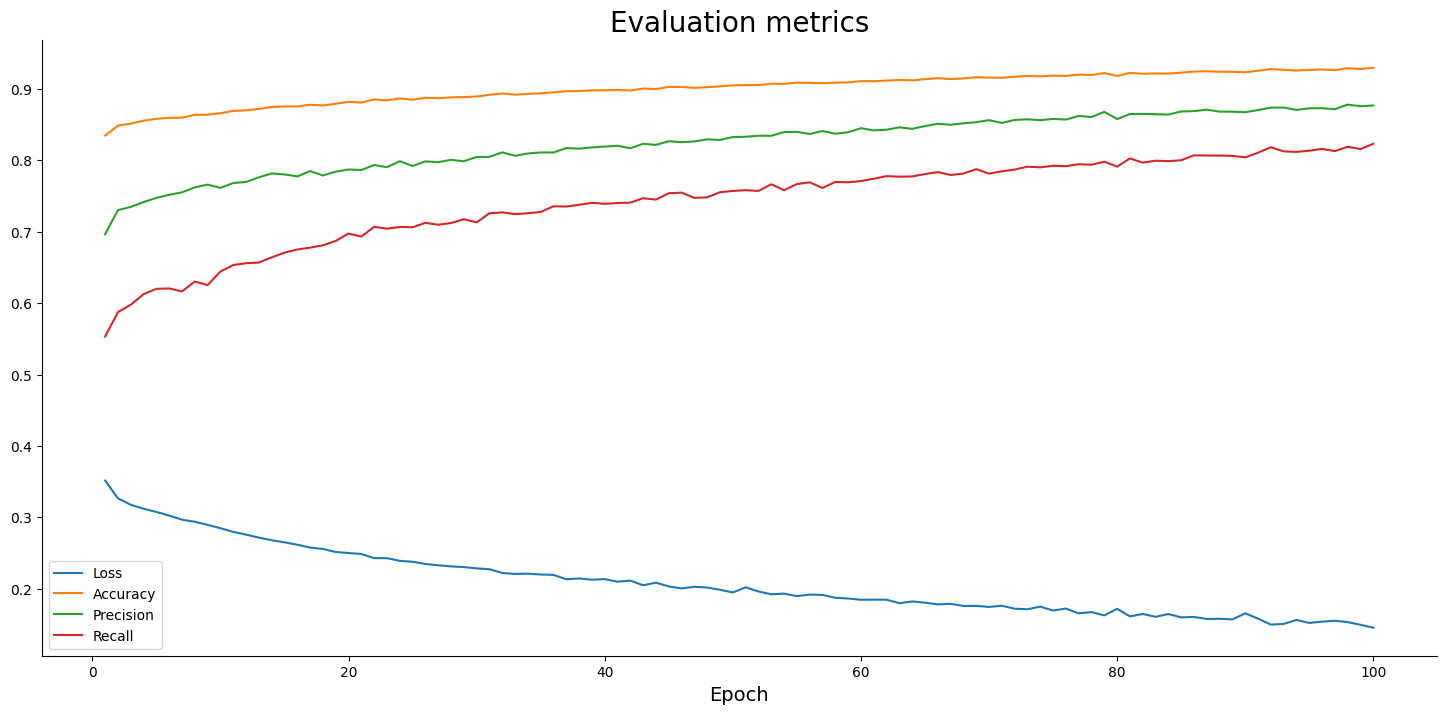

In [52]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [54]:
predictions = model.predict(X_test)

306/306 [==============================] - 1s 4ms/step


In [55]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

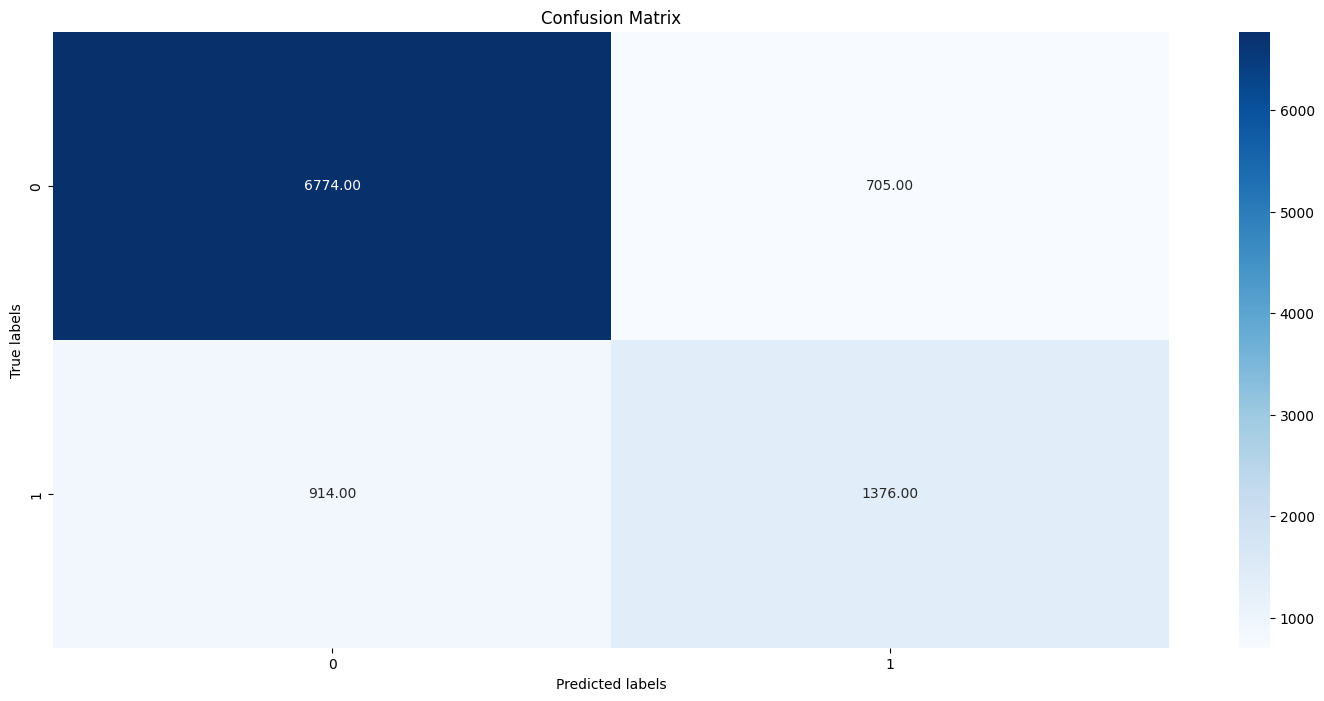

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test, prediction_classes)


# Generate heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.2f')

# Add axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Display plot
plt.show()

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.83
Precision: 0.66
Recall: 0.60
